In [1]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import nept
import hypertools as hyp

/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mac

In [4]:
# Modify if you have different file structure or want to use different file.
data_path = os.path.join(os.path.abspath('../..'), 'MotivationalT')
data_folder_d3 = os.path.join(data_path, 'R042', 'R042-2013-08-18')
data_folder_d4 = os.path.join(data_path, 'R042', 'R042-2013-08-19')

# load the info file, which contains experiment-specific information
sys.path.append(data_folder_d3)
sys.path.append(data_folder_d4)
import r042d3 as info_d3
import r042d4 as info_d4

# Load spikes (.t and ._t) from this experiment
spikes_d3 = nept.load_spikes(data_folder_d3)
spikes_d4 = nept.load_spikes(data_folder_d4)

In [12]:
# Construct binned spikes (Q-matrix) using on-track data.
on_track_start_d3 = info_d3.task_times['on_track'].time[0, 0]
on_track_end_d3 = info_d3.task_times['on_track'].time[0, 1]
binsize = 0.025

binned_spikes_d3 = nept.utils.bin_spikes(spikes_d3, [on_track_start_d3, on_track_end_d3], binsize, gaussian_std=2, normalized=True)

In [13]:
binned_spikes_d3.data.shape

(96199, 107)

In [14]:
# Find left and right trials
left_epochs_d3 = info_d3.experiment_times['left_trials'].time
right_epochs_d3 = info_d3.experiment_times['right_trials'].time

left_b_spikes_d3 = binned_spikes_d3.time_slice(left_epochs_d3[:, 0], left_epochs_d3[:, 1])
right_b_spikes_d3 = binned_spikes_d3.time_slice(right_epochs_d3[:, 0], right_epochs_d3[:, 1])

In [15]:
print(left_b_spikes_d3.data.shape)
print(right_b_spikes_d3.data.shape)

(7460, 107)
(9312, 107)


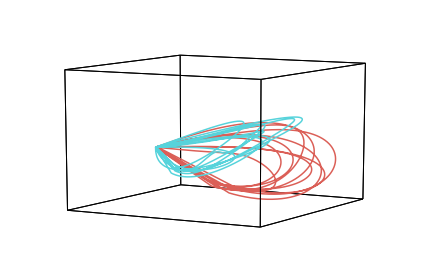

In [16]:
# Plot binned_spikes for left and right trials
geo = hyp.plot([left_b_spikes_d3.data, right_b_spikes_d3.data])

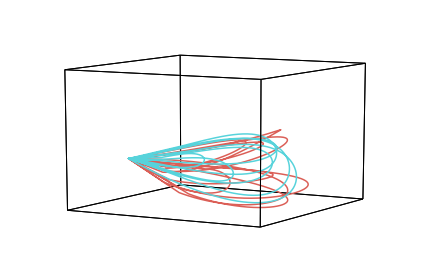

In [34]:
aligned_spks = hyp.align([left_b_spikes.data, right_b_spikes.data])
geo = hyp.plot(aligned_spks)

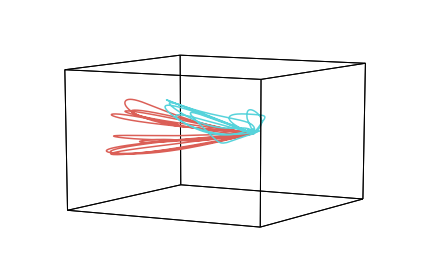

In [40]:
aligned_spks = hyp.align([left_b_spikes.data, right_b_spikes.data[:7460]], align='SRM')
geo = hyp.plot(aligned_spks)